# Visualisation gradient

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
qTable = pd.read_csv("data csv/qTable.csv")
print(qTable)

                                                   0  \
0  0.0036621093749999887;0.007324218749999979;0.0...   
1  0.0036621093749999887;0.014648437499999962;0.0...   
2  0.007324218749999979;0.02929687499999993;0.014...   
3  0.014648437499999962;0.058593749999999875;0.02...   
4  0.02929687499999993;0.02929687499999993;0.0585...   
5  0.058593749999999875;0.014648437499999962;0.02...   
6  0.02929687499999993;0.007324218749999979;0.014...   
7  0.014648437499999962;0.0036621093749999887;0.0...   
8  0.007324218749999979;0.001831054687499994;0.00...   
9  0.0036621093749999887;0.001831054687499994;0.0...   

                                                   1  \
0  0.007324218749999979;0.014648437499999962;0.00...   
1  0.007324218749999979;0.02929687499999993;0.007...   
2  0.014648437499999962;0.058593749999999875;0.01...   
3  0.02929687499999993;0.11718749999999978;0.0292...   
4  0.058593749999999875;0.058593749999999875;0.05...   
5  0.11718749999999978;0.02929687499999993;0.02

[[0.   0.   0.   0.   0.01 0.02 0.03 0.06 0.09 0.07]
 [0.   0.   0.   0.01 0.01 0.03 0.06 0.12 0.16 0.13]
 [0.   0.   0.01 0.01 0.03 0.06 0.12 0.23 0.33 0.26]
 [0.   0.01 0.01 0.03 0.06 0.12 0.23 0.47 0.66 0.52]
 [0.01 0.01 0.02 0.04 0.08 0.16 0.33 0.66 1.   0.75]
 [0.   0.01 0.01 0.03 0.06 0.12 0.23 0.47 0.66 0.52]
 [0.   0.   0.01 0.01 0.03 0.06 0.12 0.23 0.33 0.26]
 [0.   0.   0.   0.01 0.01 0.03 0.06 0.12 0.16 0.13]
 [0.   0.   0.   0.   0.01 0.01 0.03 0.06 0.08 0.06]
 [0.   0.   0.   0.   0.   0.01 0.02 0.03 0.05 0.03]]


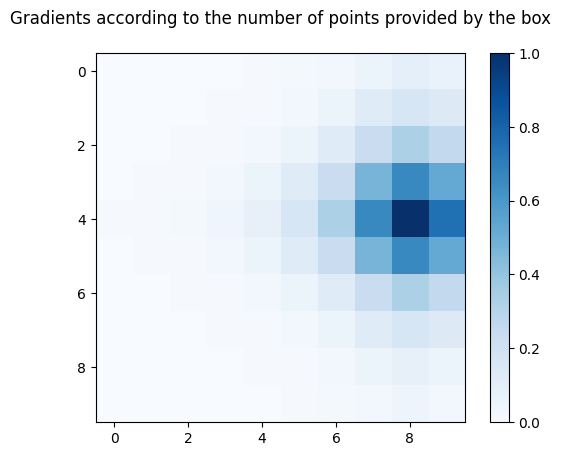

In [6]:
def plot_grid(datatable):
    """Convertir le datatable en une matrice 10x10 de listes de nombres"""
    matrix = np.zeros((10,10,4))
    for i in range(10):
        for j in range(10):
            str_values = datatable.iloc[i,j]
            values = [float(x) for x in str_values.split(";")]
            matrix[i,j] = values

    # Somme des 4 nombres pour chaque case
    matrix = np.sum(matrix, axis=2)
    min_val, max_val = np.min(matrix), np.max(matrix)
    matrix = (matrix - min_val) / (max_val - min_val)
    matrix = np.round(matrix, 2)
    print(matrix)
    
    # Afficher la grille avec des couleurs +/- foncées
    plt.imshow(matrix, cmap='Blues')
    plt.colorbar()
    plt.title("Gradients according to the number of points provided by the box\n")
    plt.show()



plot_grid(qTable)



    public partial class Form1 : Form
    {
        Grid grid = new Grid();
        private int gridShape;
        private Point positionHero;
        private Point positionTresor;

        private List<int[]> pathHero;
        private int currentIndex=0;

        private Timer timer;

        private Button exploitationButton;

        public Form1()
        {
            this.Size = new Size(800, 600);

            InitializeComponent();

            grid.InitGrid();
            this.gridShape = grid.qVector.Length / 10;
            this.positionTresor = new Point(grid.coordTreasure[1] * 30, grid.coordTreasure[0] * 30);
            InitializeGrid();

            grid.Exploration();
            this.pathHero = grid.Exploitation();

            InitializeTimer();


            exploitationButton = new Button();
            exploitationButton.Text = "Exploitation";
            exploitationButton.Click += new EventHandler(OnExploitationButtonClick);
            exploitationButton.Location = new Point(0, 11*30);
            this.Controls.Add(exploitationButton);
        }


        private void OnExploitationButtonClick(object sender, EventArgs e)
        {
            grid.InitGrid();
            this.gridShape = grid.qVector.Length / 10;
            InitializeGrid();
            grid.Exploration();
            this.pathHero = grid.Exploitation();
            currentIndex = 0;
            timer.Start();
        }

        private void InitializeGrid()
        {
            this.ClientSize = new Size(30 * (gridShape+30), 30 * (gridShape+10));
            this.BackColor = Color.White;
        }

        private void InitializeTimer()
        {
            this.timer = new Timer();
            this.timer.Interval = 700;
            this.timer.Tick += new EventHandler(OnTimerTick);
            this.timer.Start();
        }

        private void OnTimerTick(object sender, EventArgs e)
        {
            if (currentIndex < pathHero.Count)
            {
                this.positionHero = new Point(pathHero[currentIndex][1] * 30, pathHero[currentIndex][0] * 30);
                this.currentIndex++;
                this.Refresh();
            }
            else
            {
                this.timer.Stop();
            }
        }


        protected override void OnPaint(PaintEventArgs e)
        {
            base.OnPaint(e);
            if (positionHero == positionTresor)
            {
                FillColor(e.Graphics, positionHero, Color.Purple);
            }
            else
            {
                FillColor(e.Graphics, positionHero, Color.Blue);
                FillColor(e.Graphics, positionTresor, Color.Red);
            }
            DrawGrid(e.Graphics);
            DrawQVector(e.Graphics);
        }

        private void FillColor(Graphics g, Point point, Color color)
        {
            SolidBrush brush = new SolidBrush(color);
            g.FillRectangle(brush, point.X, point.Y, 30, 30);
        }

        private void DrawGrid(Graphics g)
        {
            Pen pen = new Pen(Color.Black);
            for (int i = 0; i <= gridShape; i++)
            {
                int x = i * 30;
                g.DrawLine(pen, x, 0, x, gridShape * 30);
            }
            for (int j = 0; j <= gridShape; j++)
            {
                int y = j * 30;
                g.DrawLine(pen, 0, y, gridShape * 30, y);
            }
        }

        private void DrawQVector(Graphics g)
        {
            Font font = new Font("Arial", 8);
            Brush brush = Brushes.Black;
            int size = grid.qVector.GetLength(0);
            int xStart = size * 30 + 50;
            int yStart = 50;

            for (int i = 0; i < size; i++)
            {
                for (int j = 0; j < size; j++)
                {
                    double value = grid.qVector[i, j][0] + grid.qVector[i, j][1] + grid.qVector[i, j][2] + grid.qVector[i, j][3];
                    g.DrawString(Convert.ToString(Math.Round(value,3)), font, brush, xStart + j * 50, yStart + i * 50);
                }
            }
        }

    }